Register for an account:
 - https://data.marine.copernicus.eu/register

Learn how to configure your access in python
 - https://help.marine.copernicus.eu/en/articles/6135460-how-to-configure-a-simple-opendap-access-directly-in-python
   
Links:
 - https://data.marine.copernicus.eu/viewer
 - https://data.marine.copernicus.eu/product/SEALEVEL_GLO_PHY_L4_NRT_OBSERVATIONS_008_046/services

In [15]:
plt.rcParams['font.size']=14
plt.rcParams['axes.labelsize']='medium'

In [1]:
import matplotlib.pyplot as plt
import xarray as xr

In [22]:


# Dataset ID
# DATASET_ID = "cmems_mod_glo_phy-thetao_anfc_0.083deg_P1D-m"
DATASET_ID = 'dataset-duacs-nrt-global-merged-allsat-phy-l4'

# Subsetting parameters
TIME = slice('2023-04-19', '2023-06-08')
DEPTH = 0
x1,x2=121,125
y1,y2=-15.5,-12
LONGITUDE = slice(x1,x2)
LATITUDE = slice(y1,y2)

# Read product via OPeNDAP
DS = xr.open_dataset(f"https://nrt.cmems-du.eu/thredds/dodsC/{DATASET_ID}")\
.sel(time=TIME, latitude=LATITUDE, longitude=LONGITUDE)
DS

<xarray.Dataset>
Dimensions:    (latitude: 14, longitude: 16, nv: 2, time: 51)
Coordinates:
  * latitude   (latitude) float32 -15.38 -15.12 -14.88 ... -12.62 -12.38 -12.12
  * longitude  (longitude) float32 121.1 121.4 121.6 121.9 ... 124.4 124.6 124.9
  * nv         (nv) int32 0 1
  * time       (time) datetime64[ns] 2023-04-19 2023-04-20 ... 2023-06-08
Data variables: (12/13)
    crs        int32 ...
    lat_bnds   (latitude, nv) float32 ...
    lon_bnds   (longitude, nv) float32 ...
    sla        (time, latitude, longitude) float64 ...
    err_sla    (time, latitude, longitude) float64 ...
    ugosa      (time, latitude, longitude) float64 ...
    ...         ...
    vgosa      (time, latitude, longitude) float64 ...
    err_vgosa  (time, latitude, longitude) float64 ...
    adt        (time, latitude, longitude) float64 ...
    ugos       (time, latitude, longitude) float64 ...
    vgos       (time, latitude, longitude) float64 ...
    flag_ice   (time, latitude, longitude) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    time_coverage_duration:          P1D
    time_coverage_end:               2023-09-11T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2023-09-10T12:00:00Z
    title:                           NRT merged all satellites Global Ocean G...
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention

In [23]:
# plt.figure(figsize=(10,5))
# DS['sla'].isel(time=0).plot()

In [24]:
from utils import plot_swot_basemap

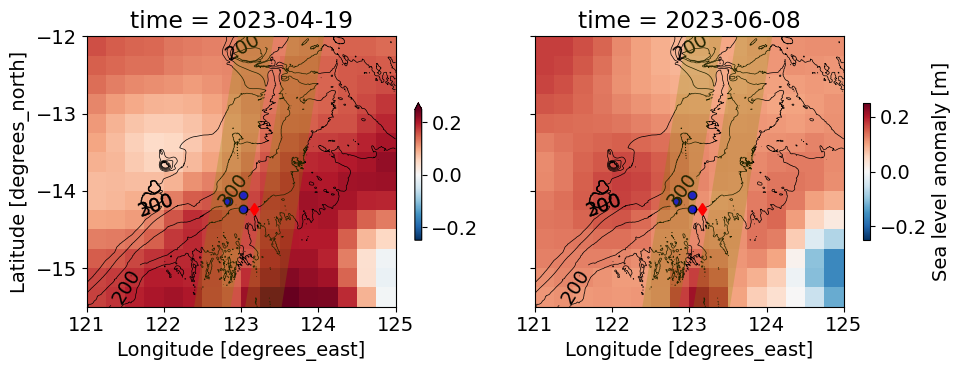

In [26]:
plt.figure(figsize=(10,5))
ax=plt.subplot(121)
DS['sla'].isel(time=0).plot(vmin=-0.25, vmax=0.25, cmap='RdBu_r', cbar_kwargs={"shrink": 0.3,'label':''},)
c=plot_swot_basemap(ax, (x1,x2), (y1,y2))
plt.clabel(c, levels=(200,300))

ax2=plt.subplot(122)
DS['sla'].isel(time=-1).plot(vmin=-0.25, vmax=0.25, cmap='RdBu_r', cbar_kwargs={"shrink": 0.3},)
c=plot_swot_basemap(ax2, (x1,x2), (y1,y2))
ax2.set_yticklabels([])
ax2.set_ylabel('')
plt.clabel(c, levels=(200,300))
plt.tight_layout()
plt.savefig('../FIGURES/SSALTO_DUACS_AllSat_L4.png',dpi=150)

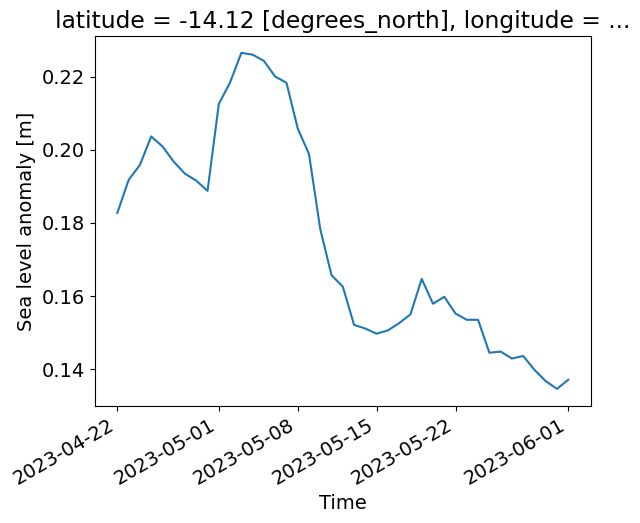

In [21]:
# Plot a time series
TS = DS.sel(longitude=122.8370658081835, latitude=-14.13718816307405, method='nearest')
TS['sla'].plot()

In [6]:
# ds_ssh = xr.open_dataset('https://my.cmems-du.eu/thredds/dodsC/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1M-m')
# ds_ssh

In [7]:
plt.figure(figsize=(10,5))
ds_ssh['sla'].sel(time='2022-07-15').plot()

NameError: name 'ds_ssh' is not defined

<Figure size 1000x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,5))
ax=plt.subplot(111)
ds_ssh['sla'].sel(time='2022-07-15').plot(vmin=-0.5, vmax=0.5, cmap='RdBu_r')
ax.set_xlim(10, 140)
ax.set_ylim(-60, 40)